# **Actividad Práctica: Modelo de Regresión**
Lucero Díaz Ortega A01199346

## **Parte 1: Exploración (10 minutos)**

In [3]:
import pandas as pd
df = pd.read_csv('Advertising.csv')
df = df.drop(columns=['Unnamed: 0'])

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


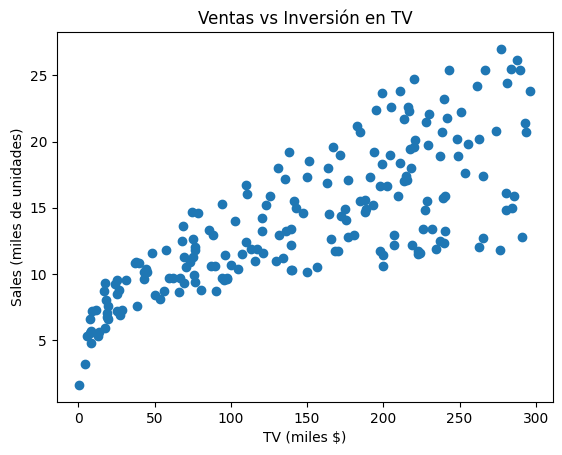

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV (miles $)')
plt.ylabel('Sales (miles de unidades)')
plt.title('Ventas vs Inversión en TV')
plt.show()

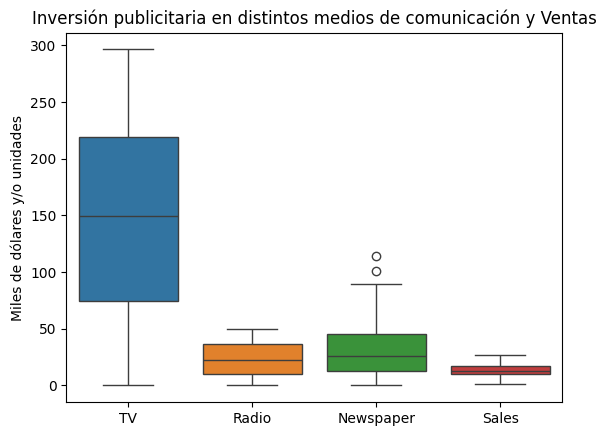

In [16]:
import seaborn as sns
sns.boxplot(data=df)
plt.xlabel('')
plt.ylabel('Miles de dólares y/o unidades')
plt.title('Inversión publicitaria en distintos medios de comunicación y Ventas')
plt.show()

1.  **Distribución de variables: ¿Cuál es el rango de TV? ¿Y el de Sales? ¿Hay outliers?**
El rango de TV tiene como mínimo 0.7 y como máximo 246.4; mientras que el de Sales tiene como mínimo 1.6 y como máximo 27. Por las boxplots mostradas en ambas variables, no hay outliers en ninguna.

2. **Correlación TV-Sales: ¿Es positiva o negativa? ¿Qué tan fuerte es?**
Es positiva y muy fuerte, considerando que supera el 0.7 de correlación.

3. **Patrón en el scatter plot: ¿La relación parece lineal? ¿Hay puntos muy alejados del patrón general?**
Tiene un mayor parecifo a una gráfica logarítmica, pero tampoco se aleja mucho de ser lineal.

## **Parte 2: Modelado**

In [8]:
import numpy as np

X = df['TV'].values
Y = df['Sales'].values

X_mean = np.mean(X)
Y_mean = np.mean(Y)

numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean)**2)
beta_1 = numerator / denominator

beta_0 = Y_mean - beta_1 * X_mean

print(f'beta_0 = {beta_0:.3f}')
print(f'beta_1 = {beta_1:.3f}')


beta_0 = 7.033
beta_1 = 0.048


In [10]:
from sklearn.linear_model import LinearRegression

X = df[['TV']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

print(f'Intercepto: {model.intercept_:.3f}')
print(f'Pendiente: {model.coef_[0]:.3f}')

y_pred = model.predict(X)

Intercepto: 7.033
Pendiente: 0.048


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y, y_pred)

print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

MSE: 10.513
RMSE: 3.242
R²: 0.612


## **Parte 3: Visualización**

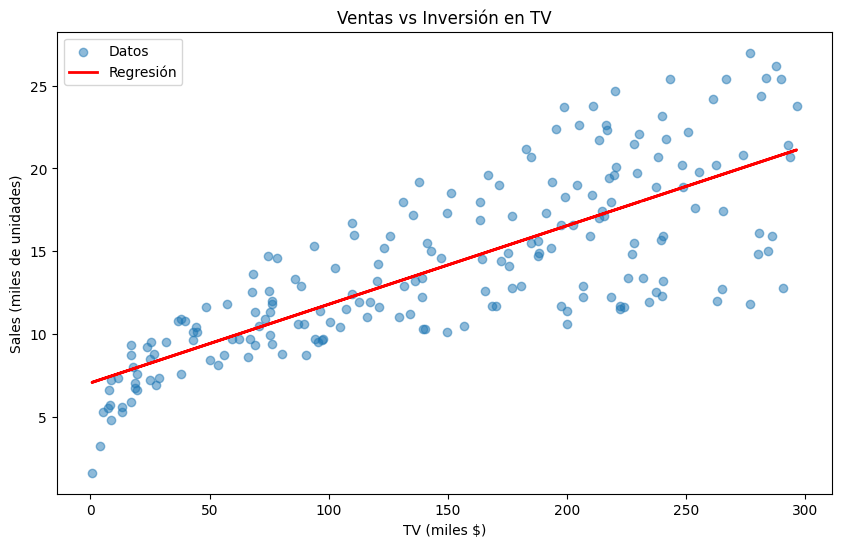

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Datos')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresión')
plt.xlabel('TV (miles $)')
plt.ylabel('Sales (miles de unidades)')
plt.legend()
plt.title('Ventas vs Inversión en TV')
plt.show()

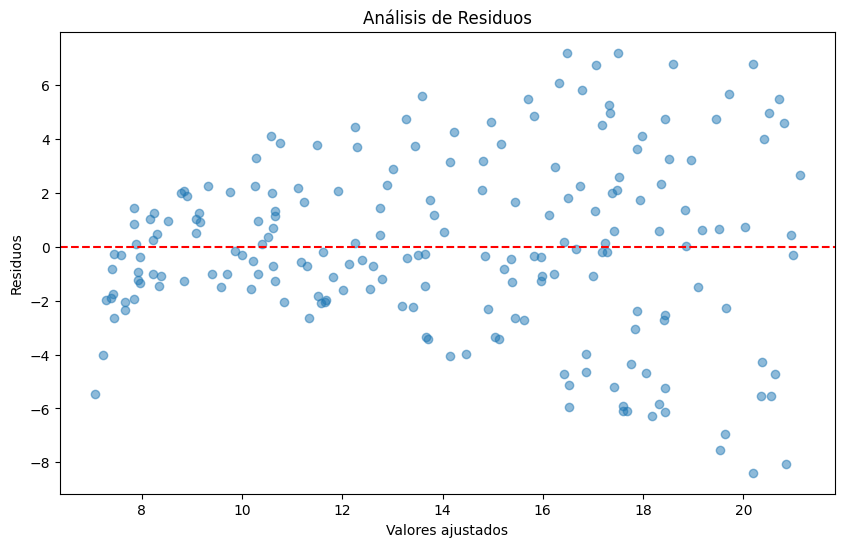

In [13]:
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.show()

Su forma es parecida a un embudo, lo que me hace deducir que la dispersión incrementa.

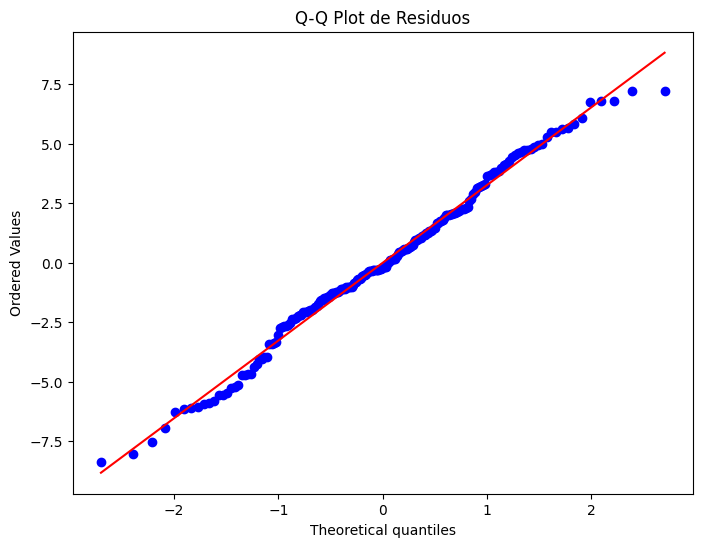

In [14]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.show()

## **Parte 4: Interpretación**

1. **¿Qué significa β₀ = 7.03? (Pista: ¿cuántas ventas esperarías con $0 de inversión en TV?)**
Implica la cifra esperada de miles de unidades vendidas por la empresa sin necesidad de invertir en publicidad en TV.

2. **¿Qué significa β₁ = 0.048? (Pista: ¿qué pasa con las ventas si aumentas la inversión en TV en mil dólares?)**
La cantidad de miles de unidades que aumentan las ventas esperada por cada mil dólares en inversión publicitaria en TV.

3. **Si inviertes 100 mil dólares más en TV, ¿cuántas ventas adicionales esperas?**
Se esperarían 100*0.048 miles de ventas adicionales, es decir, 4.8
miles de unidades adicionales.

4. **R² = 0.61. ¿Es bueno o malo? (Pista: ¿qué porcentaje de la variabilidad en ventas explica el modelo? ¿Qué porcentaje queda sin explicar?)**
Este valor implica que este modelo explica el 61% de variabilidad en ventas, lo que quiere decir que el porcentaje restante (39%) queda sin explicar. Esto porcentaje se considera bueno en el ámbito financiero.

5. **¿Recomendarías invertir más en TV basándote solamente en este análisis?**
A simple vista se ve una relación positiva entre inversión en TV y ventas, así que no se puede negar que la publicidad en TV si genera ganancias. Sin embargo, se puede observar el boxplot incial que prácticamente la mayoría de la inversión en publicidad es para TV, lo que puede llegar a explicar la asociación positiva con las ventas. Recomensaría que se siguiera invirtiendo, pero no podría asegurar que lo más óptimo sería invertir aún más en TV; hay que tomar en cuenta también los demás medios de comunicación.